# PipePlotly: Comprehensive Pipe Operator Tutorial (v0.2.0)

**Author:** Dr. Yasser Mustafa ([yasser.mustafan@gmail.com](mailto:yasser.mustafan@gmail.com))


Welcome to the complete guide to using the **Pipe Operator (`>>`)** in PipePlotly. This tutorial covers everything from basic plotting to advanced data pipelines and integration with other packages.

## 1. Introduction & Package Overview
PipePlotly is designed to make visualization in Python as intuitive as possible by providing a verb-based API. It supports two primary styles:
1. **Method Chaining:** `Plot(df).plot_points('x', 'y').show()`
2. **Pipe Operator:** `df >> Plot() >> plot_points('x', 'y') >> show()`

The pipe operator style is inspired by R's `tidyverse` and is particularly powerful for building analytical pipelines.

> [!TIP]
> **How to read the `>>` operator:** 
> Read it as **"pipe to"** or **"and then"**. For example, `df >> Plot() >> show()` is read as *"take the dataframe, **pipe it to** a Plot, **and then** show it."*

## 2. Core Philosophy
- **Immutability:** Every operation returns a new `Plot` object, preserving the original state.
- **Backend Agnostic:** Switch between static (`plotnine`) and interactive (`Plotly`) modes with a single verb.
- **Readability:** Code should read like a sentence.

> [!TIP]
> **How to read the `>>` operator:** 
> Read it as **"pipe to"** or **"and then"**. For example, `df >> Plot() >> show()` is read as *"take the dataframe, **pipe it to** a Plot, **and then** show it."*

## 3. Comparison: Pipe (`>>`) vs Chaining (`.`)

| Feature | Method Chaining (`.`) | Pipe Operator (`>>`) |
| :--- | :--- | :--- |
| **Style** | Object-Oriented | Functional |
| **Data Start** | `Plot(df)` | `df >> Plot()` |
| **Readability** | High | Very High |
| **Flexibility** | Good | Excellent (Data + Visualization) |
| **IDE Support** | Strong Autocomplete | Evolving |

> [!TIP]
> **How to read the `>>` operator:** 
> Read it as **"pipe to"** or **"and then"**. For example, `df >> Plot() >> show()` is read as *"take the dataframe, **pipe it to** a Plot, **and then** show it."*

## 4. Setup & Imports

> [!TIP]
> **How to read the `>>` operator:** 
> Read it as **"pipe to"** or **"and then"**. For example, `df >> Plot() >> show()` is read as *"take the dataframe, **pipe it to** a Plot, **and then** show it."*

In [3]:
import pandas as pd
import numpy as np
from pipeplotly import Plot
from pipeplotly.verbs import *  # Import all visualization verbs

# Check for optional dependencies
try:
    import skmisc
    print("[✓] pipeplotly version 0.2.0 loaded")
    print("[✓] scikit-misc is installed (smoothing enabled)")
except ImportError:
    print("[✓] pipeplotly version 0.2.0 loaded")
    print("[⚠] scikit-misc NOT found. add_smooth(method='loess') will require: pip install scikit-misc")

[✓] pipeplotly version 0.2.0 loaded
[✓] scikit-misc is installed (smoothing enabled)


In [4]:
# Create comprehensive sample dataset
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'x': np.arange(n),
    'y': np.random.randn(n).cumsum() + 10,
    'category': np.random.choice(['Control', 'Test A', 'Test B'], n),
    'intensity': np.random.uniform(0, 10, n),
    'time': pd.date_range('2023-01-01', periods=n, freq='D')
})
df.head()

,x,y,category,intensity,time
0,0,10.496714,Control,3.722828,2023-01-01
1,1,10.358450,Test A,9.401334,2023-01-02
2,2,11.006138,Control,9.736638,2023-01-03
3,3,12.529168,Control,2.839210,2023-01-04
4,4,12.295015,Test B,3.053639,2023-01-05


## 5. Basic Geometries
The first step in any plot is defining the geometry.

> [!TIP]
> **How to read the `>>` operator:** 
> Read it as **"pipe to"** or **"and then"**. For example, `df >> Plot() >> show()` is read as *"take the dataframe, **pipe it to** a Plot, **and then** show it."*

### 5.1 Scatter Plots (`plot_points`)

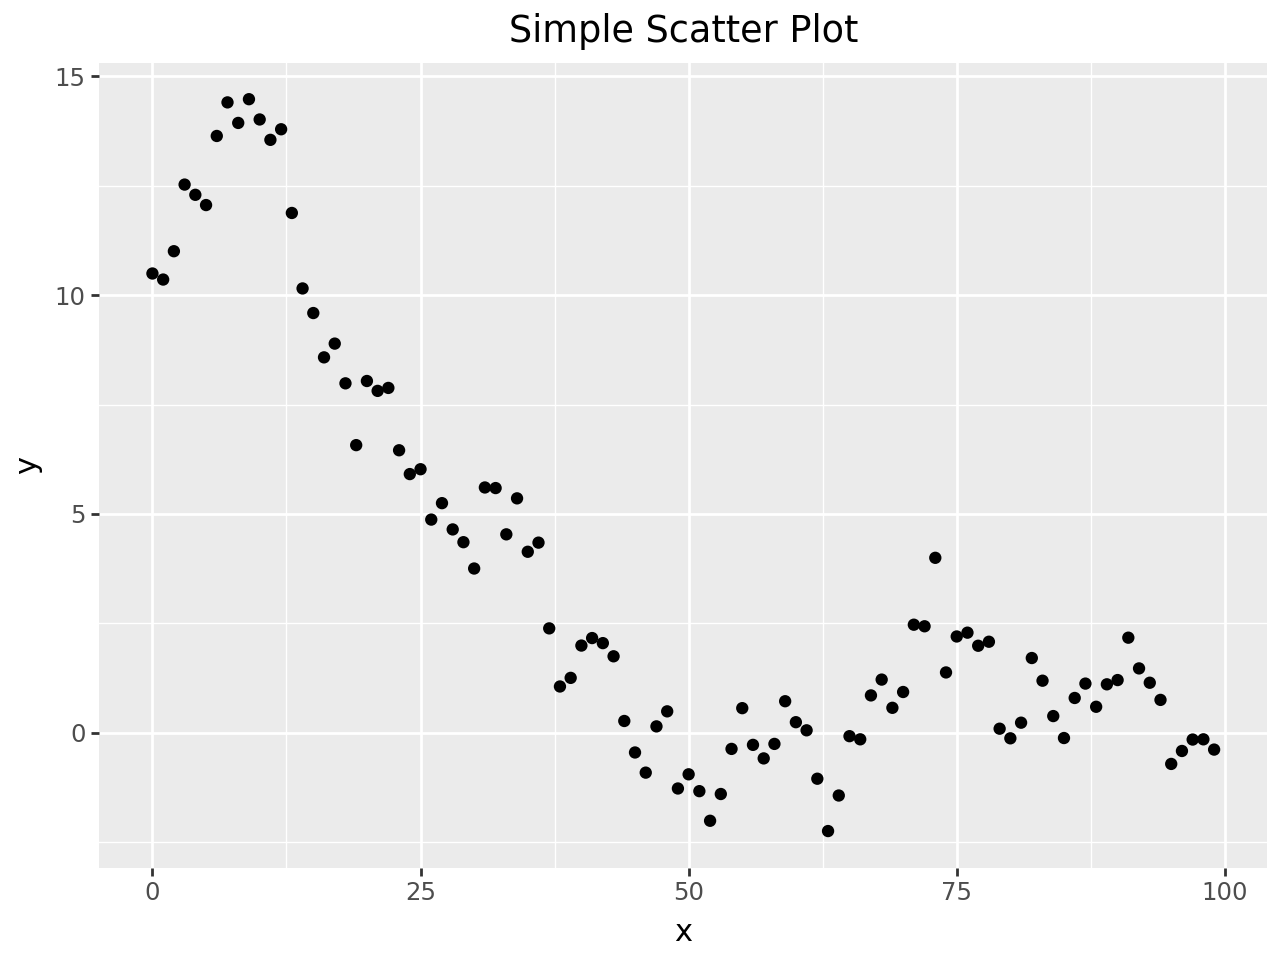

Plot(geom='point', backend='plotnine', data_shape=(100, 5))

In [5]:
(df 
 >> Plot() 
 >> plot_points('x', 'y') 
 >> add_labels(title='Simple Scatter Plot')
 >> show())

### 5.2 Line Plots (`plot_lines`)

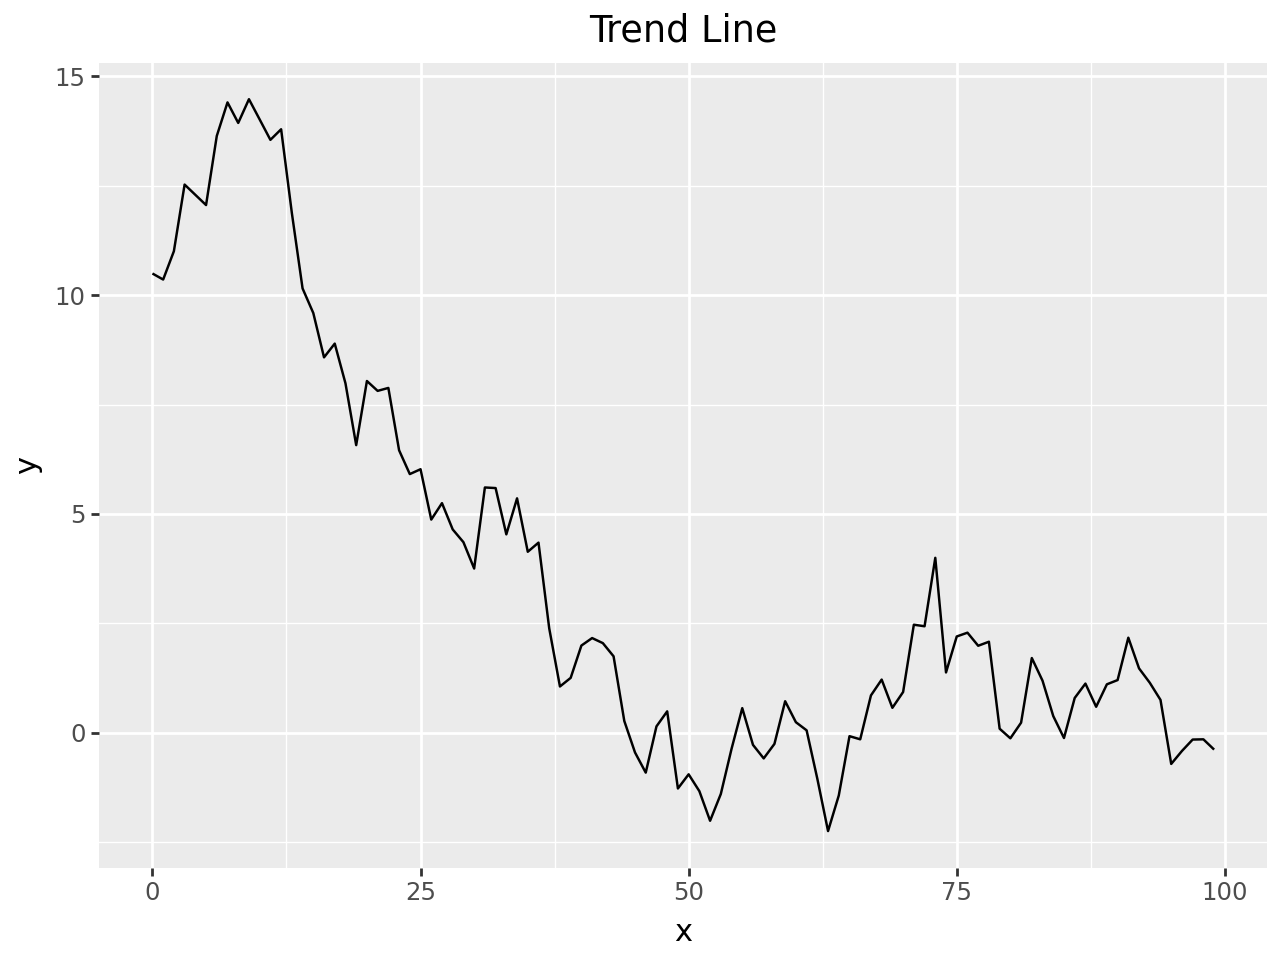

Plot(geom='line', backend='plotnine', data_shape=(100, 5))

In [6]:
(df 
 >> Plot() 
 >> plot_lines('x', 'y') 
 >> add_labels(title='Trend Line')
 >> show())

### 5.3 Bar Charts (`plot_bars`)

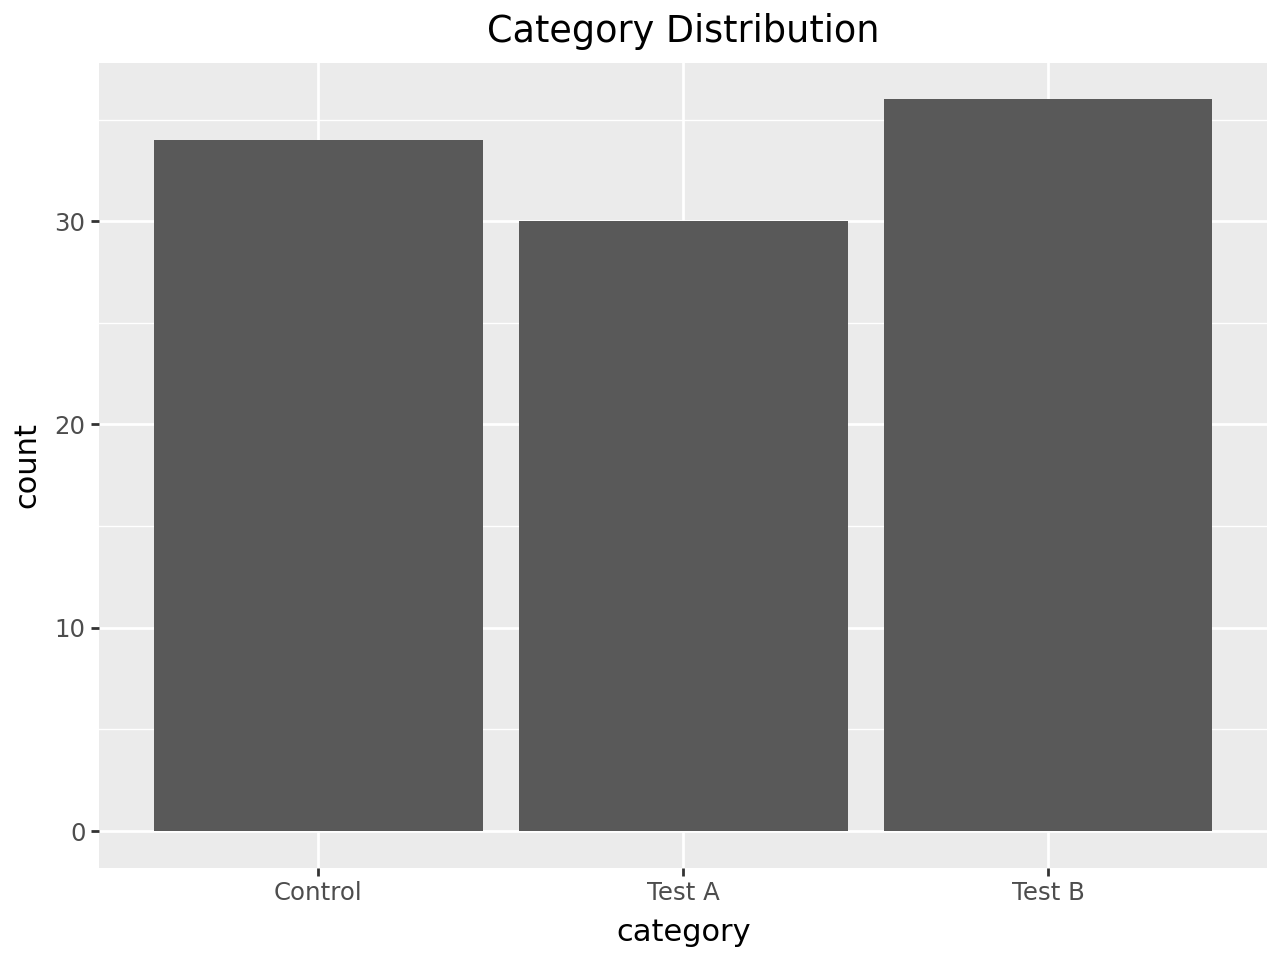

Plot(geom='bar', backend='plotnine', data_shape=(100, 5))

In [7]:
(df 
 >> Plot() 
 >> plot_bars('category')  # Frequency count
 >> add_labels(title='Category Distribution')
 >> show())

### 5.4 Histograms (`plot_histogram`)

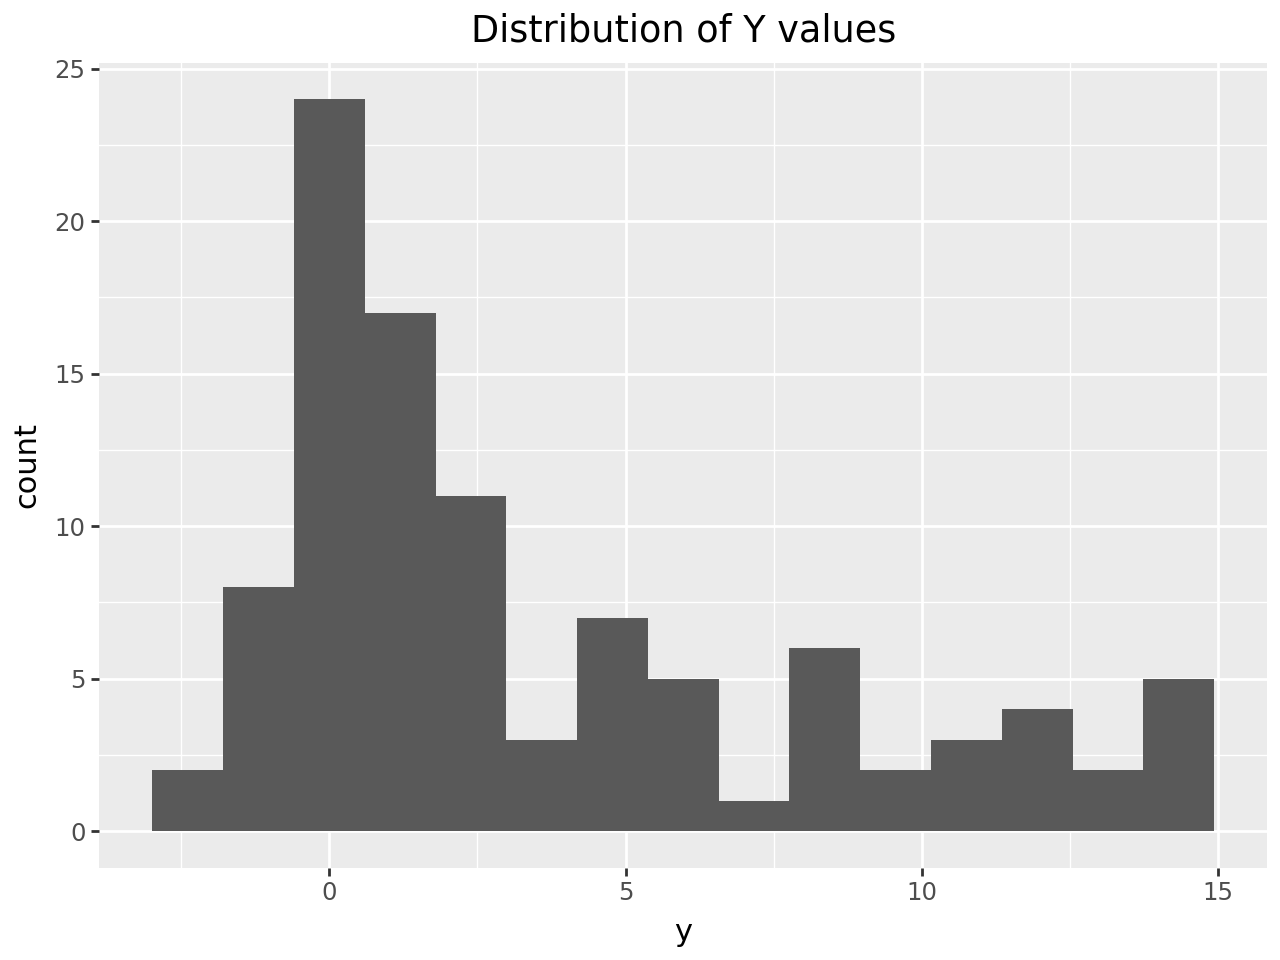

Plot(geom='histogram', backend='plotnine', data_shape=(100, 5))

In [8]:
(df 
 >> Plot() 
 >> plot_histogram('y', bins=15) 
 >> add_labels(title='Distribution of Y values')
 >> show())

### 5.5 Box & Violin Plots 

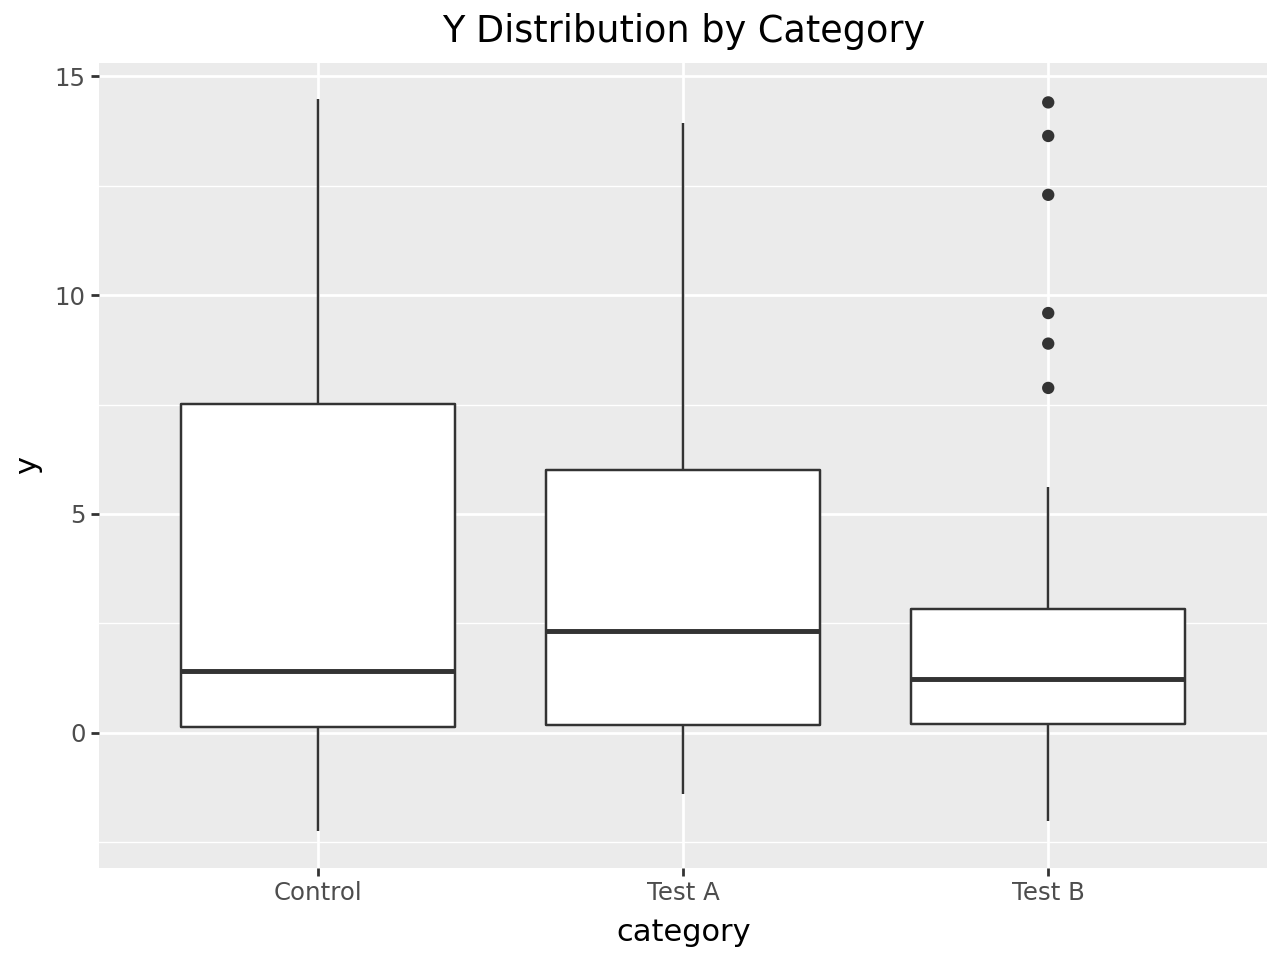

Plot(geom='box', backend='plotnine', data_shape=(100, 5))

In [9]:
(df 
 >> Plot() 
 >> plot_box('category', 'y') 
 >> add_labels(title='Y Distribution by Category')
 >> show())

## 6. Aesthetics & Mapping
Aesthetics map data variables to visual properties.

In [10]:
(df 
 >> Plot() 
 >> plot_points('x', 'y') 
 >> add_color('category')  # Color by category
 >> add_size('intensity')   # Size by intensity
 >> add_alpha(0.7)          # Set fixed transparency
 >> add_labels(title='Multiple Aesthetics Mapping')
 >> show())

ValueError: Column '0.7' not found in data

## 7. Faceting (Small Multiples)
Split your plot into multiples based on a categorical variable.

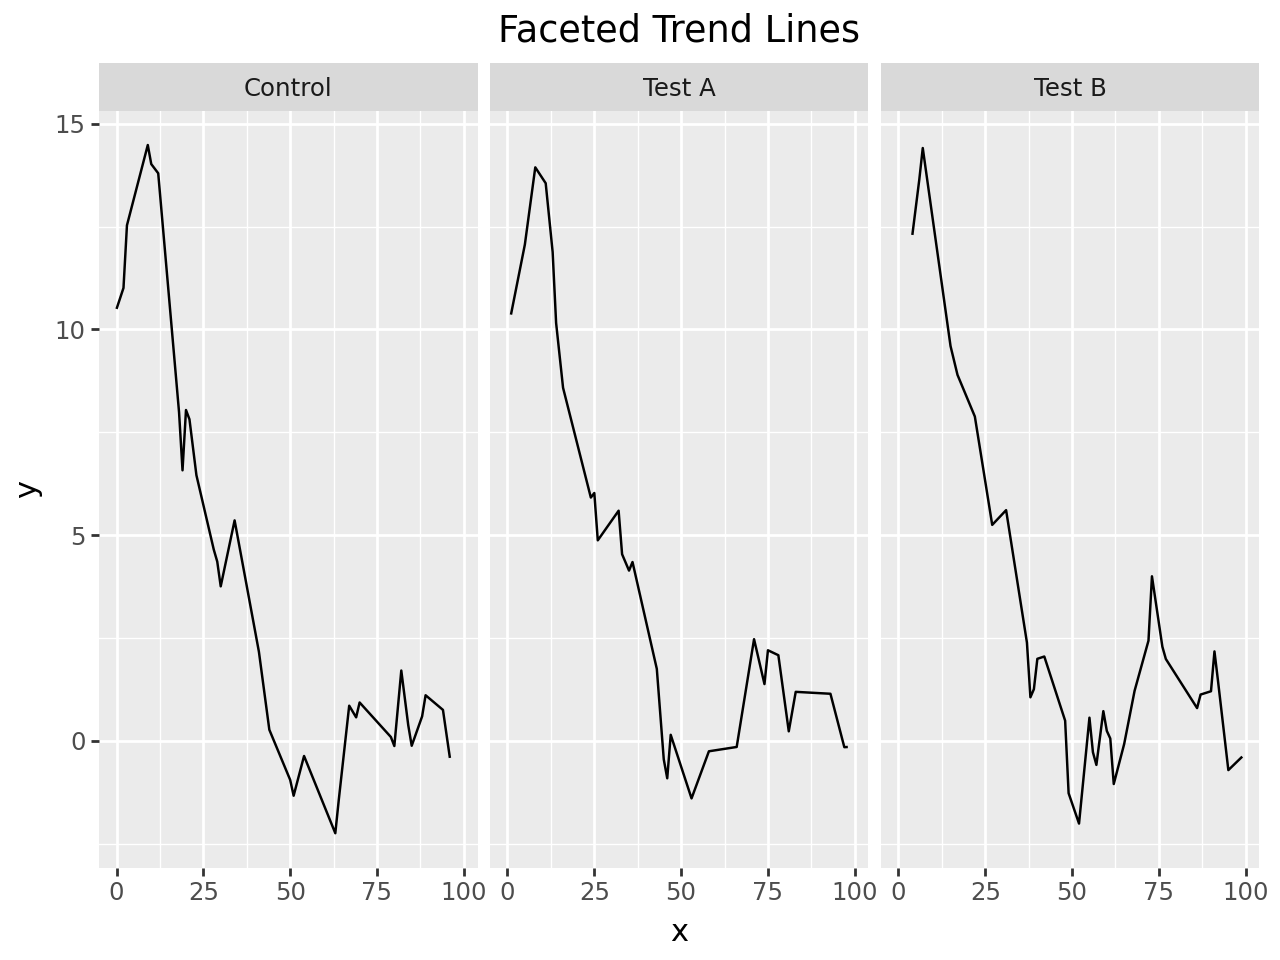

Plot(geom='line', backend='plotnine', data_shape=(100, 5))

In [11]:
(df 
 >> Plot() 
 >> plot_lines('x', 'y') 
 >> add_facets(wrap='category') 
 >> add_labels(title='Faceted Trend Lines')
 >> show())

## 8. Statistical Layers (Smoothing)

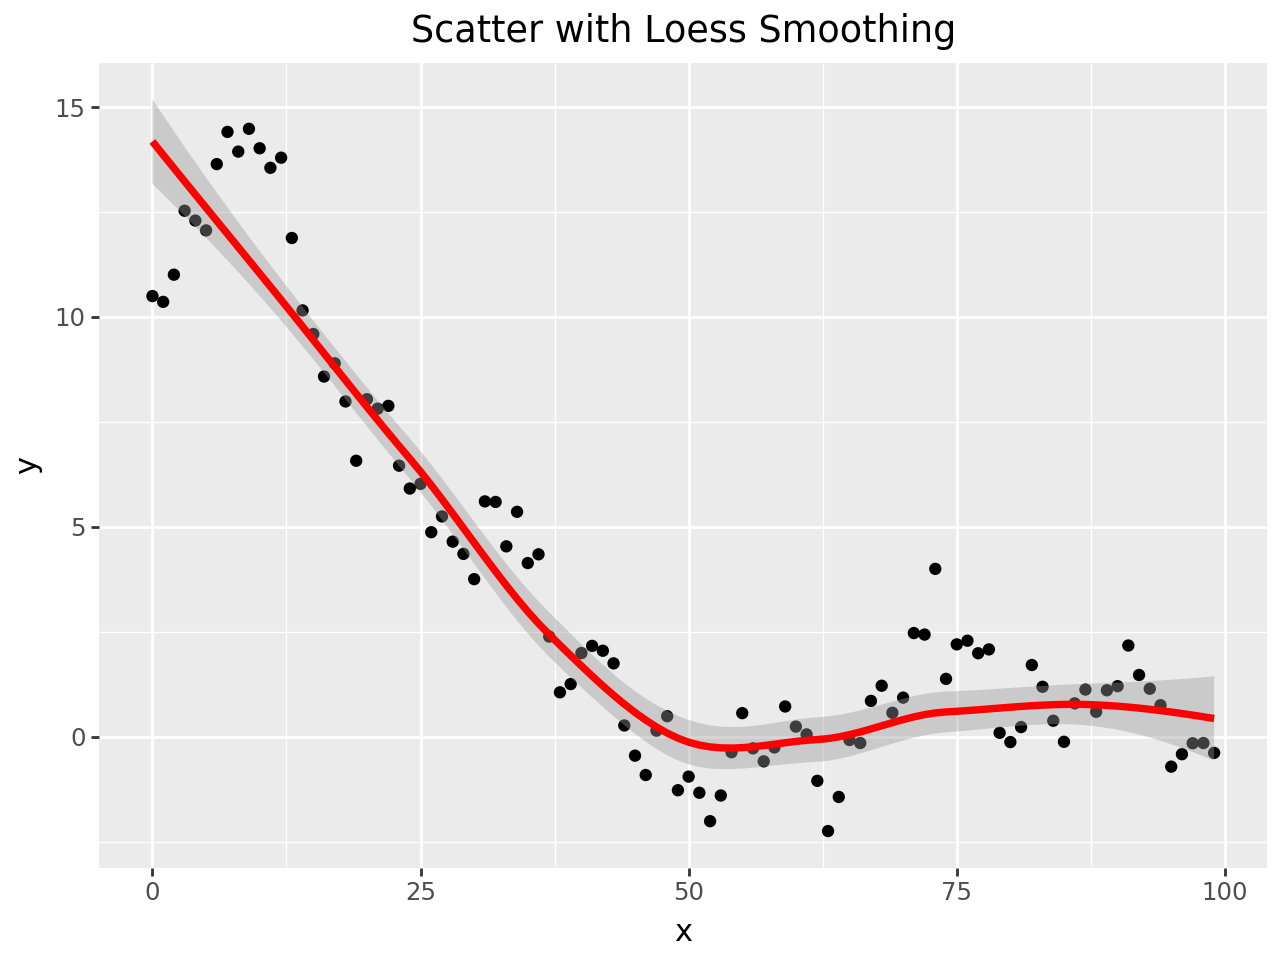

Plot(geom='point', backend='plotnine', data_shape=(100, 5))

In [12]:
(df 
 >> Plot() 
 >> plot_points('x', 'y') 
 >> add_smooth(method='loess', color='red', size=1.5)
 >> add_labels(title='Scatter with Loess Smoothing')
 >> show())

## 9. Scales & Coordinates

c:\Users\yasse\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
c:\Users\yasse\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 5 rows containing missing values.


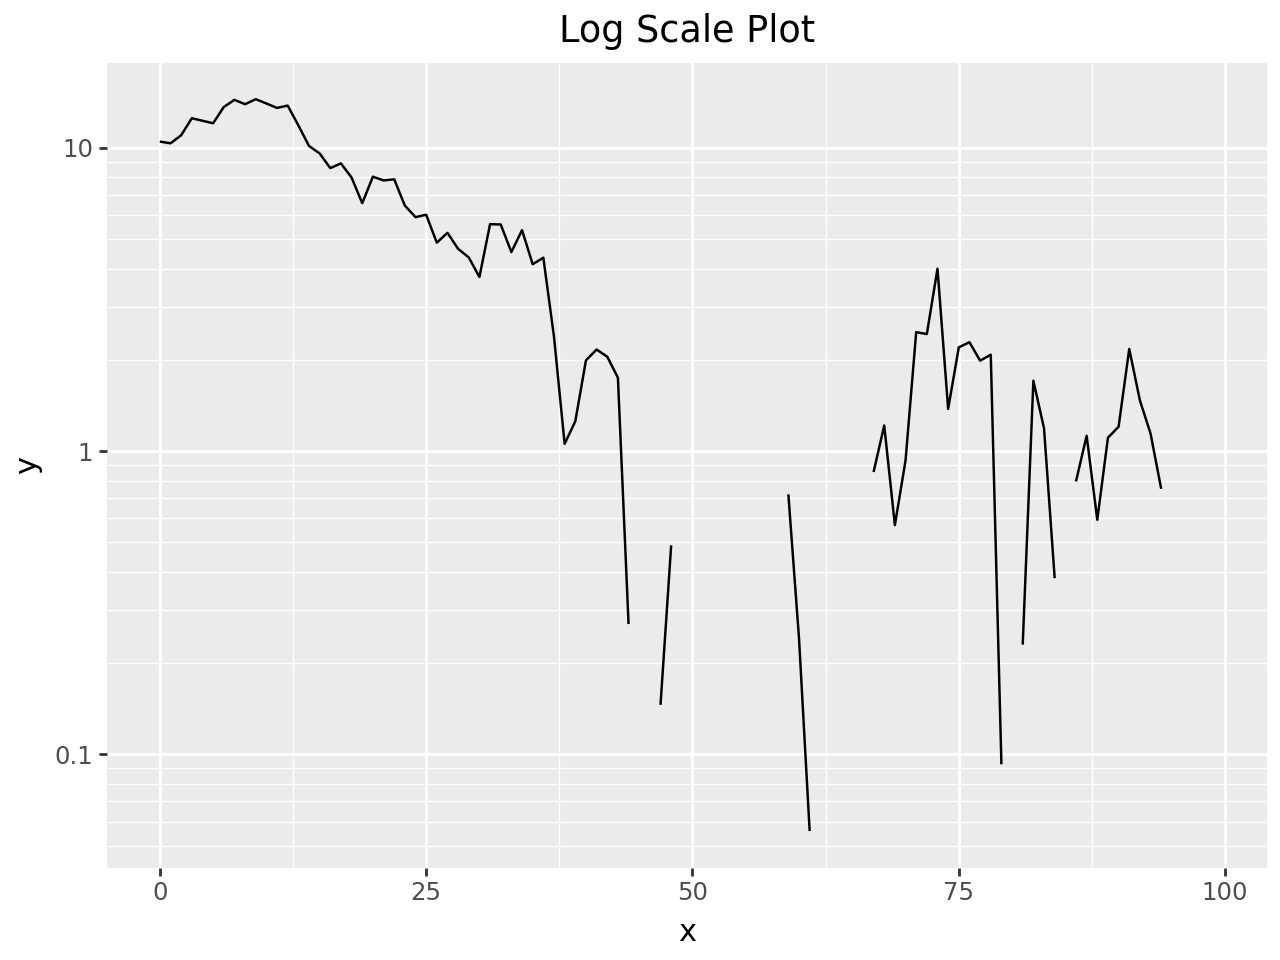

Plot(geom='line', backend='plotnine', data_shape=(100, 5))

In [13]:
(df 
 >> Plot() 
 >> plot_lines('x', 'y') 
 >> scale_y_log() 
 >> add_labels(title='Log Scale Plot')
 >> show())

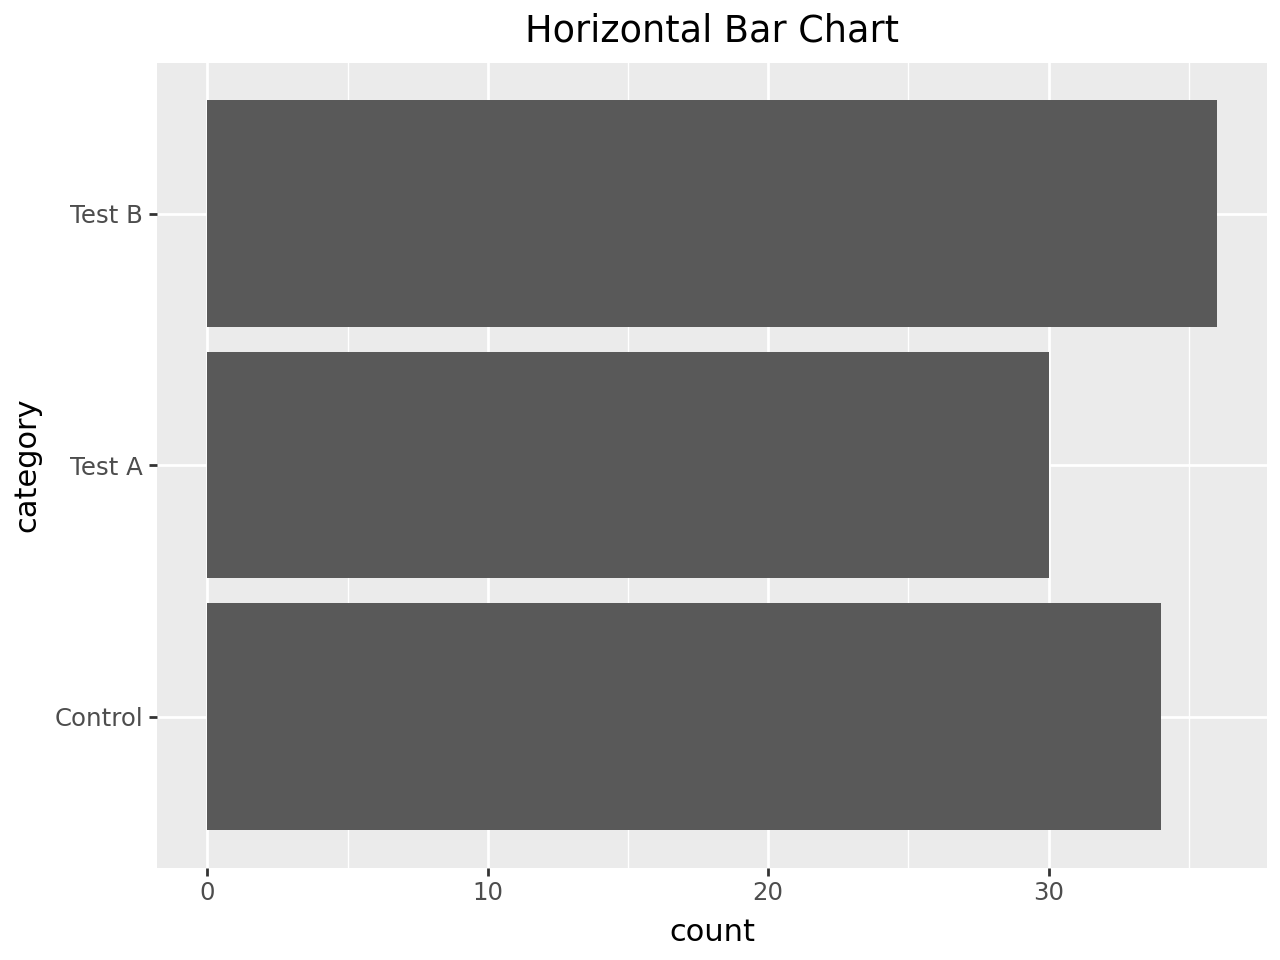

Plot(geom='bar', backend='plotnine', data_shape=(100, 5))

In [14]:
(df 
 >> Plot() 
 >> plot_bars('category') 
 >> coord_flip() 
 >> add_labels(title='Horizontal Bar Chart')
 >> show())

## 10. Themes & Styling

In [ ]:
(df 
 >> Plot() 
 >> plot_points('x', 'y') 
 >> set_theme('dark') 
 >> add_labels(title='Dark Theme Plot')
 >> show())

## 11. Backend Interchangeability
Switch between static (plotnine) and interactive (Plotly) modes easily.

In [15]:
# Interactive Mode
(df 
 >> Plot() 
 >> plot_points('x', 'y') 
 >> add_color('category') 
 >> to_interactive() 
 >> show())

c:\Users\yasse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


Plot(geom='point', backend='plotly', data_shape=(100, 5))

## 12. Saving & Exporting

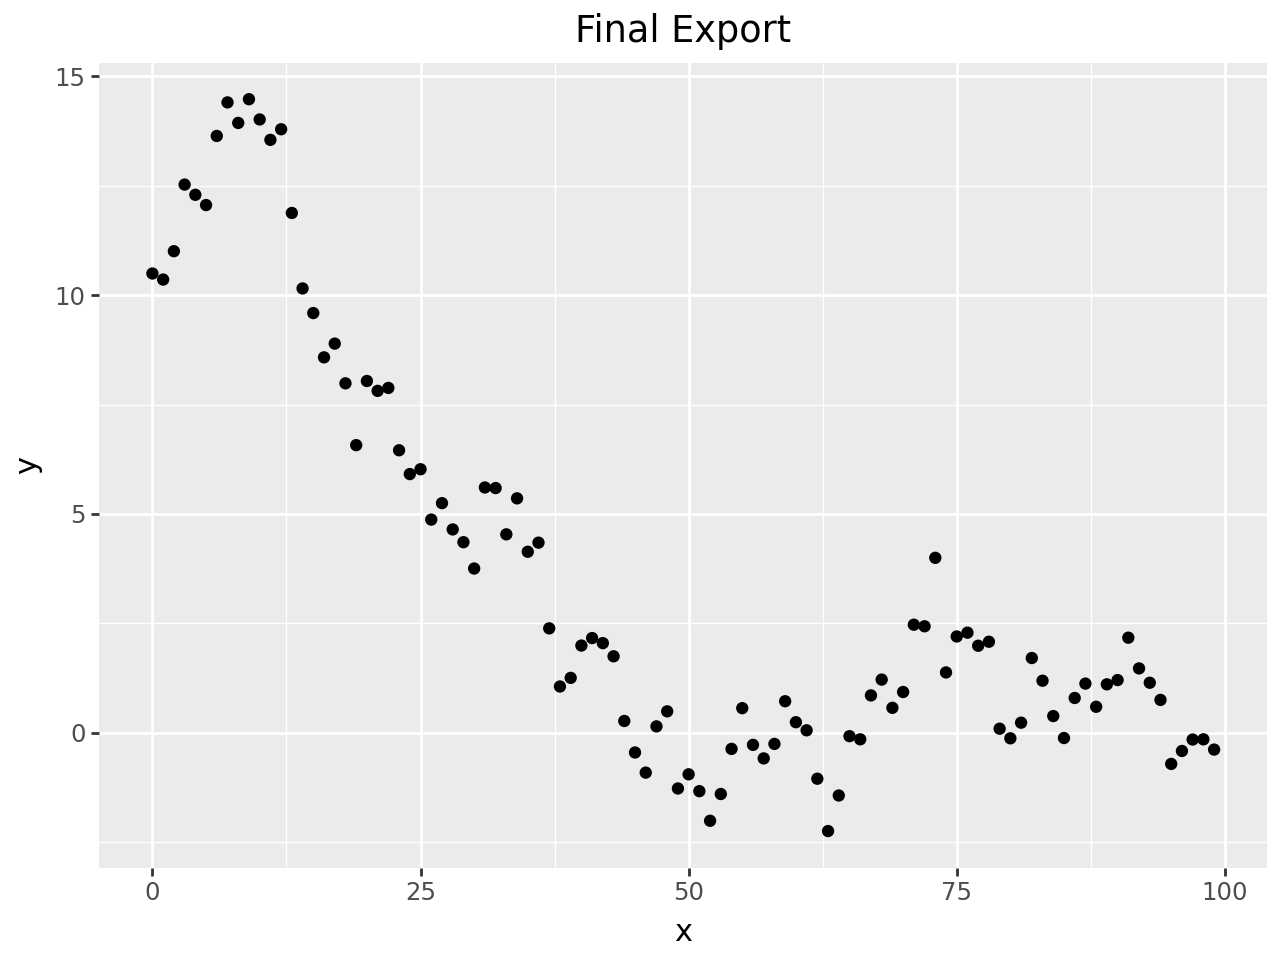

In [16]:
plot = (df 
        >> Plot() 
        >> plot_points('x', 'y') 
        >> add_labels(title='Final Export')
        # >> save('output_plot.png', width=10, height=6, dpi=300) 
        >> show())

## 13. DataFrame Integration
PipePlotly is built to work seamlessly with `pipeframe` for unified data and visualization pipelines.

In [17]:
try:
    import pipeframe as pf
    
    # Unified Pipeline
    result = (df 
              >> pf.pf_df() 
              >> (lambda p: p[p._df['y'] > 10])  # Data Pipe
              >> Plot()                          # Viz Pipe
              >> plot_points('x', 'y') 
              >> add_color('category') 
              >> show())
    print("[✓] Integrated Pipeline executed successfully")
except ImportError:
    print("[⚠] pipeframe not installed. Run: pip install pipeframe")

AttributeError: module 'pipeframe' has no attribute 'PipeFrame'

--- 
**End of Tutorial** - Check the [API Reference](API_REFERENCE.md) for a full list of available verbs.